In [50]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## data.info
- 변수 설명을 보고 의미 있을 변수 판단하기

In [54]:
info_data=pd.read_csv('c:/open/data_info.csv')
info_data

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


## train.csv

In [9]:
train_data=pd.read_csv("C:/open/train.csv")
train_data

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [12]:
train_data.dtypes       # 데이터타입 확인

id                        object
base_date                  int64
day_of_week               object
base_hour                  int64
lane_count                 int64
road_rating                int64
road_name                 object
multi_linked               int64
connect_code               int64
maximum_speed_limit      float64
vehicle_restricted       float64
weight_restricted        float64
height_restricted        float64
road_type                  int64
start_node_name           object
start_latitude           float64
start_longitude          float64
start_turn_restricted     object
end_node_name             object
end_latitude             float64
end_longitude            float64
end_turn_restricted       object
target                   float64
dtype: object

In [14]:
train_data.index        # 인덱스 확인

RangeIndex(start=0, stop=4701217, step=1)

In [17]:
train_data.isnull().sum()       # 결측값 없음을 확인

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

<BarContainer object of 10000 artists>

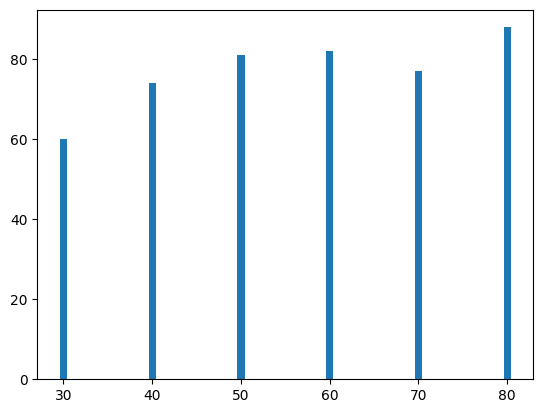

In [51]:
# 바 차트로 시각화
plt.bar(train_data.maximum_speed_limit[:10000],train_data.target[:10000])     # 최고 속도 - 차량 평균 속도 바 차트
                                                                              # 최고 속도가 올라갈수록 차량 평균 속도도 올라가는 추세

In [58]:
train=train_data[['base_date','day_of_week','base_hour','lane_count','road_rating','road_name','maximum_speed_limit','target']]
train

,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,maximum_speed_limit,target
0,20220623,목,17,1,106,지방도1112호선,60.0,52.0
1,20220728,목,21,2,103,일반국도11호선,60.0,30.0
2,20211010,일,7,2,103,일반국도16호선,80.0,61.0
3,20220311,금,13,2,107,태평로,50.0,20.0
4,20211005,화,8,2,103,일반국도12호선,80.0,38.0
...,...,...,...,...,...,...,...,...
4701212,20211104,목,16,1,107,-,50.0,20.0
4701213,20220331,목,2,2,107,-,80.0,65.0
4701214,20220613,월,22,2,103,일반국도12호선,60.0,30.0
4701215,20211020,수,2,2,103,일반국도95호선,80.0,73.0


In [61]:
# start_turn_restricted, end_turn_restricted 원 핫 인코딩
train['start_turn_restricted']=pd.get_dummies(train_data['start_turn_restricted'],drop_first=True)
train['end_turn_restricted']=pd.get_dummies(train_data['end_turn_restricted'],drop_first=True)
train

C:\Users\KYW\AppData\Local\Temp\ipykernel_21388\1748300726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['start_turn_restricted']=pd.get_dummies(train_data['start_turn_restricted'],drop_first=True)
C:\Users\KYW\AppData\Local\Temp\ipykernel_21388\1748300726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['end_turn_restricted']=pd.get_dummies(train_data['end_turn_restricted'],drop_first=True)


,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,maximum_speed_limit,target,start_turn_restricted,end_turn_restricted
0,20220623,목,17,1,106,지방도1112호선,60.0,52.0,0,0
1,20220728,목,21,2,103,일반국도11호선,60.0,30.0,1,0
2,20211010,일,7,2,103,일반국도16호선,80.0,61.0,0,0
3,20220311,금,13,2,107,태평로,50.0,20.0,0,0
4,20211005,화,8,2,103,일반국도12호선,80.0,38.0,0,0
...,...,...,...,...,...,...,...,...,...,...
4701212,20211104,목,16,1,107,-,50.0,20.0,0,0
4701213,20220331,목,2,2,107,-,80.0,65.0,0,0
4701214,20220613,월,22,2,103,일반국도12호선,60.0,30.0,0,0
4701215,20211020,수,2,2,103,일반국도95호선,80.0,73.0,0,0


In [64]:
# 데이터셋을 훈련, 테스트 셋으로 나누기
t_df_x=train[['base_hour','lane_count','maximum_speed_limit','road_rating','start_turn_restricted','end_turn_restricted']]
t_df_y=train['target']

len(t_df_x)==len(t_df_y)

x_train,x_test,y_train,y_test=train_test_split(t_df_x,t_df_y,test_size=0.3,random_state=111)

In [65]:
x_train

,base_hour,lane_count,maximum_speed_limit,road_rating,start_turn_restricted,end_turn_restricted
796231,1,3,70.0,103,1,1
642769,18,2,50.0,107,0,0
1038001,15,1,60.0,103,0,0
1431870,9,1,50.0,107,0,0
3847388,4,1,60.0,106,0,0
...,...,...,...,...,...,...
3611970,0,1,60.0,106,0,0
1678611,22,1,60.0,106,0,0
2199638,22,2,60.0,103,0,0
4330196,17,1,60.0,103,0,0


## test.csv

In [22]:
test_data=pd.read_csv("C:/open/test.csv")
test_data

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,20220827,토,5,1,103,일반국도16호선,0,0,80.0,...,0.0,0,월산마을,33.472819,126.463030,없음,도근교,33.470483,126.460846,없음
291237,TEST_291237,20220819,금,20,2,103,일반국도11호선,0,0,60.0,...,0.0,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음
291238,TEST_291238,20220805,금,11,1,107,신대로,0,0,30.0,...,0.0,0,마리나사거리,33.493624,126.496769,있음,칠오광장사거리,33.497500,126.496946,있음
291239,TEST_291239,20220812,금,7,2,107,경찰로,0,0,60.0,...,0.0,0,국민의료보험관리공단,33.254782,126.507014,없음,의료보험조합,33.255659,126.507333,없음


In [53]:
test_data.dtypes

id                        object
base_date                  int64
day_of_week               object
base_hour                  int64
lane_count                 int64
road_rating                int64
road_name                 object
multi_linked               int64
connect_code               int64
maximum_speed_limit      float64
vehicle_restricted       float64
weight_restricted        float64
height_restricted        float64
road_type                  int64
start_node_name           object
start_latitude           float64
start_longitude          float64
start_turn_restricted     object
end_node_name             object
end_latitude             float64
end_longitude            float64
end_turn_restricted       object
dtype: object